In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import linearmodels as lm

In [71]:
df = pd.read_stata('data/wagepan.dta')
df = df.set_index(['nr','year'])
df.head()

logwage  union  educ  exper  expersq  hours  black  hisp  married  \
nr year                                                                       
13 1980  1.197540      0    14      1        1   2672      0     0        0   
   1981  1.853060      1    14      2        4   2320      0     0        0   
   1982  1.344462      0    14      3        9   2940      0     0        0   
   1983  1.433213      0    14      4       16   2960      0     0        0   
   1984  1.568125      0    14      5       25   3071      0     0        0   

         occ1  ...  occ7  occ8  occ9  d81  d82  d83  d84  d85  d86  d87  
nr year        ...                                                       
13 1980     0  ...     0     0     1    0    0    0    0    0    0    0  
   1981     0  ...     0     0     1    1    0    0    0    0    0    0  
   1982     0  ...     0     0     1    0    1    0    0    0    0    0  
   1983     0  ...     0     0     1    0    0    1    0    0    0    0  
   1984     0  ...     0     0     0    0    0    0    1    0    0    0  

[5 rows x 25 columns]

In [72]:
df.columns

Index(['logwage', 'union', 'educ', 'exper', 'expersq', 'hours', 'black',
       'hisp', 'married', 'occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6',
       'occ7', 'occ8', 'occ9', 'd81', 'd82', 'd83', 'd84', 'd85', 'd86',
       'd87'],
      dtype='object')

In [73]:
subset_obs = df.index.get_level_values(0).unique()[:7]

In [74]:
df_subset = df.loc[subset_obs,'logwage']

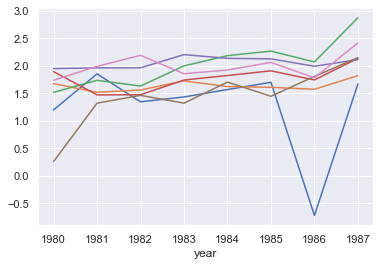

In [75]:
df_subset.unstack(0).plot(legend=None,grid=True)

In [76]:
mean_wage = df.groupby(level=0)['logwage'].mean()

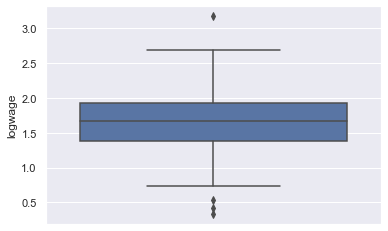

In [77]:
sns.boxplot(y=mean_wage)

Skal prøve tre ulike estimeringer.

In [78]:
lm.PanelOLS.from_formula('logwage~union+marriage+hours+EntityEffects+TimeEffects',data=df)

RuntimeError: Cannot set name on a level of a MultiIndex. Use 'MultiIndex.set_names' instead.

In [ ]:
lm.PanelOLS()

Kunne hatt lyst til å estimere med algebra. Tror jeg bare trenger å stacke matriser... må ha riktige dimensjoner

In [82]:
endog = df.logwage
exog = df[['educ','exper','expersq','hours']]

In [83]:
lm.PanelOLS(endog,exog)

RuntimeError: Cannot set name on a level of a MultiIndex. Use 'MultiIndex.set_names' instead.